In [9]:
import pandas as pd
df= pd.read_csv("/home/yasmeen/Computer_Vision_program/IMBD.csv")

print(df.head())

                                           movie  \
0                                    The Witcher   
1  Mission: Impossible - Dead Reckoning Part One   
2                               Sound of Freedom   
3                                Secret Invasion   
4                           Special Ops: Lioness   

                                     genre  runtime certificate  rating  \
0     Action, Adventure, Drama               60 min           A     8.1   
1  Action, Adventure, Thriller              163 min          UA     8.0   
2     Action, Biography, Drama              131 min       PG-13     7.9   
3     Action, Adventure, Drama               47 min      UA 16+     6.2   
4      Action, Drama, Thriller                  NaN         NaN     7.5   

                                               stars  \
0  ['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...   
1  ['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...   
2  ['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...   
3  ['Samuel 

In [10]:
print(df.columns)

Index(['movie', 'genre', 'runtime', 'certificate', 'rating', 'stars',
       'description', 'votes', 'director'],
      dtype='object')


In [11]:
print(df['rating'].isnull().sum())


15510


In [12]:
print("Before dropping null ratings:", df.shape)
df = df.dropna(subset=['rating'])
print("After dropping null ratings:", df.shape)






Before dropping null ratings: (129891, 9)
After dropping null ratings: (114381, 9)


In [14]:
print("Null genres before dropping:", df['genre'].isnull().sum())
df = df.dropna(subset=['genre'])
print("Shape after dropping null genres:", df.shape)


Null genres before dropping: 0
Shape after dropping null genres: (114381, 9)


In [15]:
before = len(df)

df = df.drop_duplicates()

after = len(df)

print(f"Duplicates dropped: {before - after} ")
print("After removing duplicates:", df.shape)


print(df.head())

Duplicates dropped: 0 
After removing duplicates: (114381, 9)
                                           movie  \
0                                    The Witcher   
1  Mission: Impossible - Dead Reckoning Part One   
2                               Sound of Freedom   
3                                Secret Invasion   
4                           Special Ops: Lioness   

                                     genre  runtime certificate  rating  \
0     Action, Adventure, Drama               60 min           A     8.1   
1  Action, Adventure, Thriller              163 min          UA     8.0   
2     Action, Biography, Drama              131 min       PG-13     7.9   
3     Action, Adventure, Drama               47 min      UA 16+     6.2   
4      Action, Drama, Thriller                  NaN         NaN     7.5   

                                               stars  \
0  ['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...   
1  ['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...   
2  ['J

In [16]:
df.head()

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN


In [17]:
df_exploded = df.copy()
df_exploded['genre'] = df_exploded['genre'].str.split(', ')
df_exploded = df_exploded.explode('genre')



df_exploded.head()


,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,Action,60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
0,The Witcher,Adventure,60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
0,The Witcher,Drama,60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,Action,163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
1,Mission: Impossible - Dead Reckoning Part One,Adventure,163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']


In [18]:

df_exploded['genre'] = df_exploded['genre'].str.strip()
df_exploded['movie'] = df_exploded['movie'].str.strip()


In [19]:
movies_by_genre = df_exploded.groupby('genre')['movie'].unique().reset_index()

movies_by_genre.head()

,genre,movie
0,Action,"[The Witcher, Mission: Impossible - Dead Recko..."
1,Adult,[The Kama Sutra of Vatsyayana]
2,Adventure,"[The Witcher, Mission: Impossible - Dead Recko..."
3,Animation,"[Invincible, Spider-Man: Across the Spider-Ver..."
4,Biography,"[Sound of Freedom, Spartacus: Blood and Sand, ..."


In [20]:
avg_rating_by_genre = df_exploded.groupby('genre', as_index=False)['rating'].mean()

avg_rating_by_genre.head(80)

,genre,rating
0,Action,6.281501
1,Adult,4.500000
2,Adventure,6.412944
3,Animation,6.813222
4,Biography,6.968937
5,Comedy,6.362556
6,Crime,6.513369
7,Documentary,7.276078
8,Drama,6.566687
9,Family,6.433987


In [21]:
import numpy as np
avg_rating_by_genre['rating_group']= np.floor(avg_rating_by_genre['rating']).astype(int)

In [22]:
avg_rating_by_genre.head(100)

,genre,rating,rating_group
0,Action,6.281501,6
1,Adult,4.500000,4
2,Adventure,6.412944,6
3,Animation,6.813222,6
4,Biography,6.968937,6
5,Comedy,6.362556,6
6,Crime,6.513369,6
7,Documentary,7.276078,7
8,Drama,6.566687,6
9,Family,6.433987,6


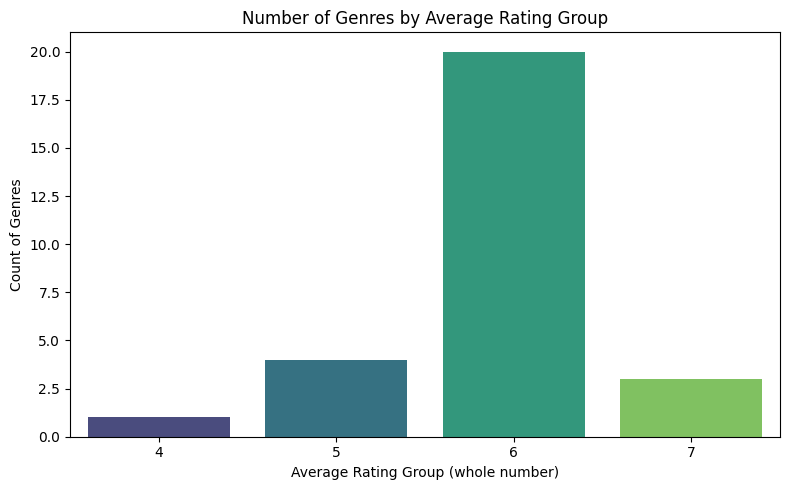

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,5))
sns.countplot(x='rating_group', data=avg_rating_by_genre.sort_values('rating_group'), palette='viridis')

plt.title('Number of Genres by Average Rating Group')
plt.xlabel('Average Rating Group (whole number)')
plt.ylabel('Count of Genres')
plt.tight_layout()
plt.show()


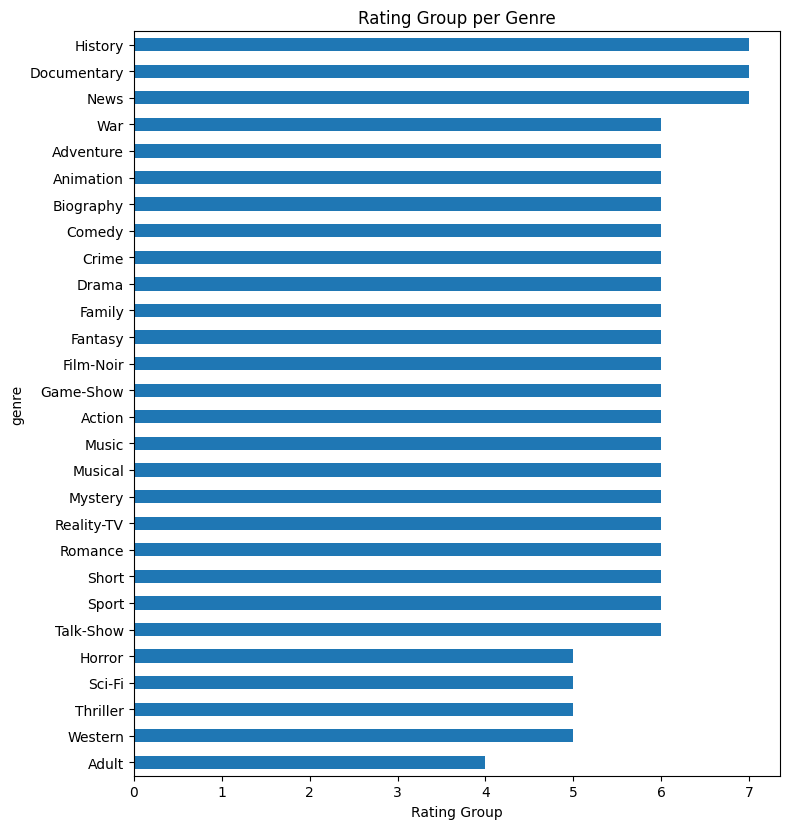

In [27]:
avg_rating_by_genre.set_index('genre')['rating_group']\
    .sort_values()\
    .plot(kind='barh', figsize=(8, len(avg_rating_by_genre) * 0.3))
plt.xlabel('Rating Group')
plt.title('Rating Group per Genre')
plt.tight_layout()
plt.show()


In [23]:
avg_rating_by_genre.to_csv('/home/yasmeen/Computer_Vision_program/avg_rating_by_genre.csv', index=False)

In [ ]:
'''
 Which genres consistently recieve higher ratings?
 History, Documentary, and News consistently receive a rating of 7.

 '''


In [55]:
genre_summary = avg_rating_by_genre.merge(movies_by_genre, on='genre', how='left')


genre_summary.head(30)

,genre,rating,rating_group,movie
0,Action,5.828057,5,[Mission: Impossible - Dead Reckoning Part One...
1,Adventure,5.936002,5,[Mission: Impossible - Dead Reckoning Part One...
2,Animation,6.393315,6,"[Miraculous - Le film, Resident Evil: Death Is..."
3,Biography,6.845727,6,"[Sound of Freedom, Ford v Ferrari, American Sn..."
4,Comedy,5.972972,5,"[They Cloned Tyrone, The Out-Laws, Guardians o..."
5,Crime,6.205888,6,"[The Out-Laws, The Dark Knight, John Wick: Cha..."
6,Documentary,7.133333,7,"[Jackass Forever, Jackass: The Movie, Jackass ..."
7,Drama,6.414548,6,"[Sound of Freedom, The Dark Knight, Dunkirk, B..."
8,Family,5.923259,5,"[The Karate Kid, Harry Potter and the Order of..."
9,Fantasy,5.748339,5,"[The Flash, Avatar: The Way of Water, Spider-M..."


In [57]:
genre_summary.to_csv('/home/yasmeen/Computer_Vision_program/IMDB_genre_ratings.csv', index=False)


In [50]:
print("Number of unique genres:", avg_rating_by_genre['genre'].nunique())


Number of unique genres: 25


In [49]:
avg_rating_by_genre.to_csv('/home/yasmeen/Computer_Vision_program/avg_rating_by_genre.csv', index=False)
